In [8]:
import numpy as np

seismic_data_filename = "F3_train.npy"
seismic_facies_filename = "F3_train_labels.npy"
seismic_attr_instantaneous_frequency_filename = "F3_train_instantaneous_frequency.npy"
seismic_attr_cosine_instantaneous_phase_filename = "F3_train_cosine_instantaneous_phase.npy"
seismic_attr_envelope_filename = "F3_train_envelope.npy"

n_facies = 200
def filter_data(data): return data[:n_facies,:,:]

# Read the seismic data samples from a NPY file
seismic_data           = filter_data(np.load(seismic_data_filename))
seismic_labels         = filter_data(np.load(seismic_facies_filename))
seismic_inst_freq      = filter_data(np.load(seismic_attr_instantaneous_frequency_filename))
seismic_cos_inst_phase = filter_data(np.load(seismic_attr_cosine_instantaneous_phase_filename))
seismic_envelope       = filter_data(np.load(seismic_attr_envelope_filename))

print("type(seismic_data):", type(seismic_data))
print("seismic_data.shape:", seismic_data.shape)
print("seismic_data.dtype:", seismic_data.dtype)
print("This seismic data contains", seismic_data.shape[0], "inlines."
      " Each inline contains",seismic_data.shape[1],
      "seismic traces, each one with", seismic_data.shape[2], "samples.")

print()
print("seismic_labels:", seismic_labels.shape)
print("seismic_inst_freq:", seismic_inst_freq.shape)
print("seismic_cos_inst_phase:", seismic_cos_inst_phase.shape)
print("seismic_envelope:", seismic_envelope.shape)

type(seismic_data): <class 'numpy.ndarray'>
seismic_data.shape: (200, 701, 255)
seismic_data.dtype: float64
This seismic data contains 200 inlines. Each inline contains 701 seismic traces, each one with 255 samples.

seismic_labels: (200, 701, 255)
seismic_inst_freq: (200, 701, 255)
seismic_cos_inst_phase: (200, 701, 255)
seismic_envelope: (200, 701, 255)


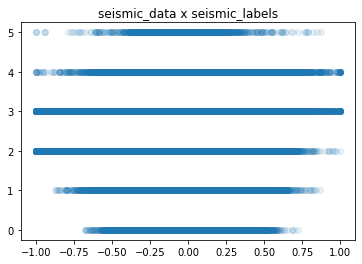

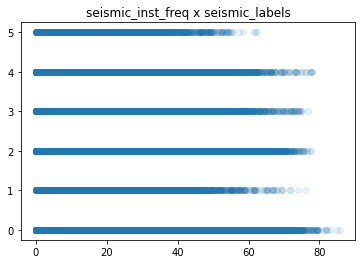

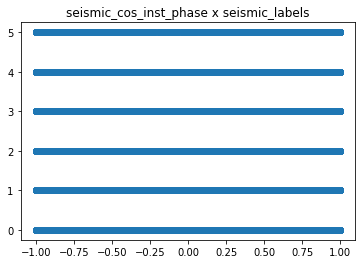

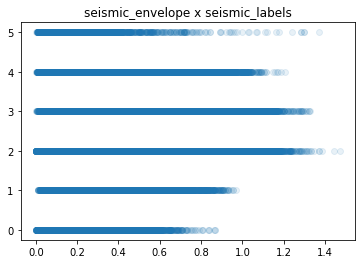

In [2]:
import matplotlib.pyplot as plt

#seismic_data
plt.title('seismic_data x seismic_labels')
plt.scatter(seismic_data[0], seismic_labels[0], alpha = 0.1)
plt.show()

#seismic_inst_freq
plt.title('seismic_inst_freq x seismic_labels')
plt.scatter(seismic_inst_freq[0], seismic_labels[0], alpha = 0.1)
plt.show()

#seismic_cos_inst_phas
plt.title('seismic_cos_inst_phase x seismic_labels')
plt.scatter(seismic_cos_inst_phase[0], seismic_labels[0], alpha = 0.1)
plt.show()

#seismic_envelope
plt.title('seismic_envelope x seismic_labels')
plt.scatter(seismic_envelope[0], seismic_labels[0], alpha = 0.1)
plt.show()

In [3]:
import pandas as pd

seismic_labels_1d = seismic_labels.reshape(-1)

data = pd.DataFrame(seismic_data.reshape(-1), columns = ['data'])
data['inst_freq']      = seismic_inst_freq.reshape(-1)
data['cos_inst_phase'] = seismic_cos_inst_phase.reshape(-1)
data['envelope']       = seismic_envelope.reshape(-1)

print(data)

             data  inst_freq  cos_inst_phase  envelope
0        0.000000   2.070780   -1.608123e-16  0.228563
1        0.008296  12.601803    1.270262e-01  0.065308
2        0.050130  14.886615    5.637458e-01  0.088922
3        0.079065   3.774447    7.124919e-01  0.110969
4        0.058989  17.552627    3.739940e-01  0.157728
...           ...        ...             ...       ...
1787545 -0.005918  17.473878   -8.580259e-02  0.068967
1787546 -0.071514   3.975614   -8.277898e-01  0.086391
1787547 -0.093518   7.424080   -7.078784e-01  0.132111
1787548 -0.083117   8.474810   -6.312739e-01  0.131665
1787549 -0.083117   6.195143   -4.902597e-01  0.169536

[1787550 rows x 4 columns]


In [4]:
print(np.unique(seismic_labels_1d, return_counts = True))

(array([0, 1, 2, 3, 4, 5], dtype=uint8), array([378404, 176823, 818653, 162841, 207606,  43223]))


In [5]:
corr_matrix = data.corr()
print(corr_matrix["data"].sort_values(ascending=False))

data              1.000000
cos_inst_phase    0.783892
inst_freq        -0.030950
envelope         -0.112606
Name: data, dtype: float64


In [2]:
import matplotlib.pyplot as plt

#Plot seismic facies
def plotFacies(seismic_labels, title = "Seismic Facies"):
    
    #Transposing the data to make visualization more natural
    panel = seismic_labels[0,:,:].T 
    
    #Plot side bar with label colors
    cmap = plt.cm.get_cmap('jet', len(np.unique(seismic_labels)))
    
    #Plot graphics
    plt.imshow(panel, cmap=cmap, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    plt.show()

## CASE 1 | Full Dataset
data, cos_inst_phase, inst_freq, envelope

In [7]:
from sklearn.preprocessing import MinMaxScaler

#Define min max scaler
scaler = MinMaxScaler()                          

#Transform data
data_train = scaler.fit_transform(data)

print(data_train.shape)

(1787550, 4)


K-means Clustering


  0%|          | 0/9 [00:00<?, ?it/s]

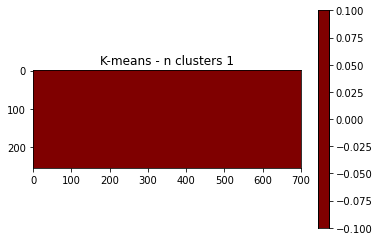

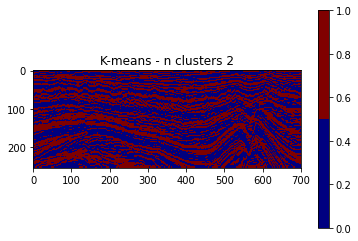

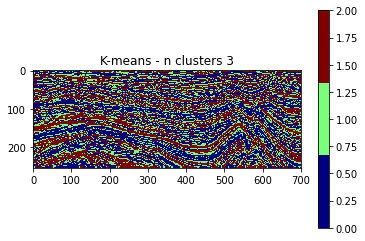

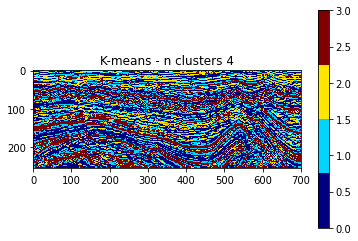

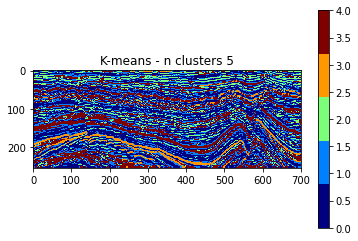

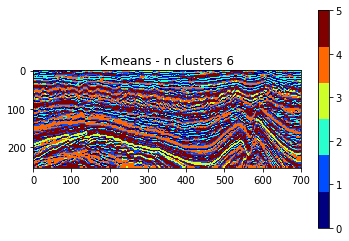

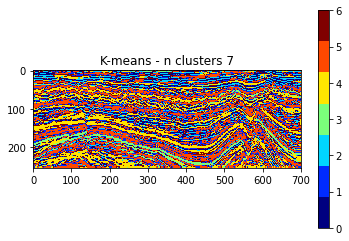

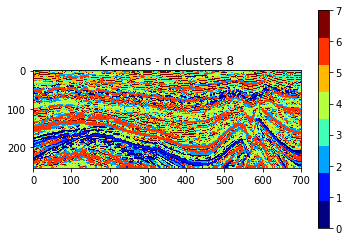

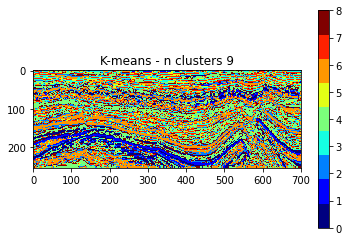

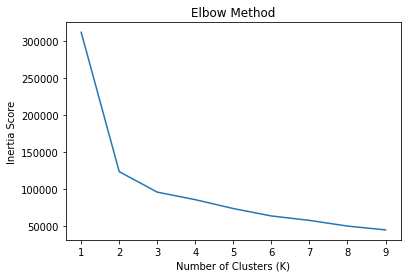

In [8]:
#K-means Clustering
import joblib
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm

#Select a linear model
print("K-means Clustering")

score = []

for n in tqdm(range(1, 10)):
        
    model = KMeans(n_clusters = n, random_state = 0, n_init = "auto")
    clusters = model.fit_predict(data_train)
    
    title = "K-means - n clusters " + str(n)
    plotFacies(clusters.reshape(n_facies, 701, 255), title)
    score.append(model.inertia_)
    joblib.dump(model, title + ".sav")

plt.plot(range(1, 10), score)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia Score')
plt.title('Elbow Method')
plt.show()

DBSCAN


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

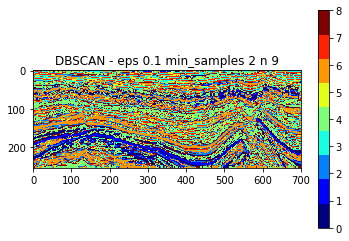

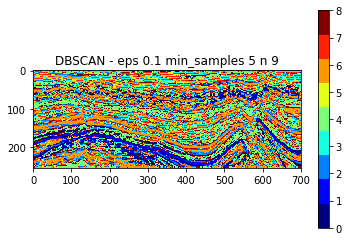

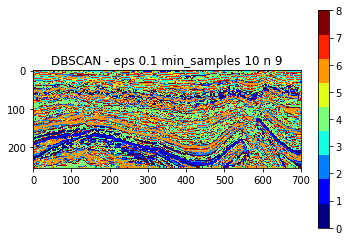

  0%|          | 0/3 [00:00<?, ?it/s]

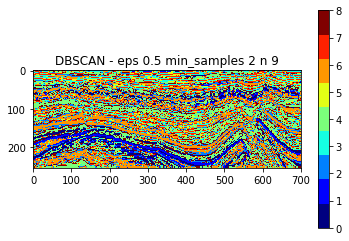

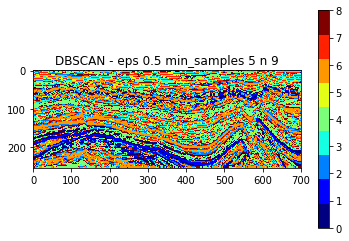

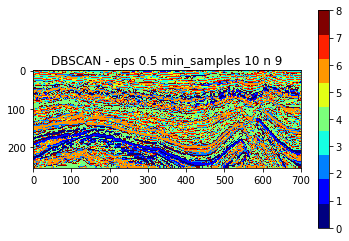

  0%|          | 0/3 [00:00<?, ?it/s]

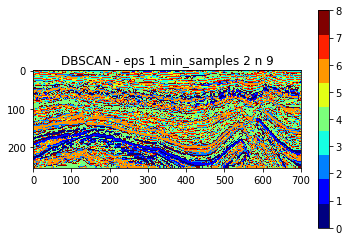

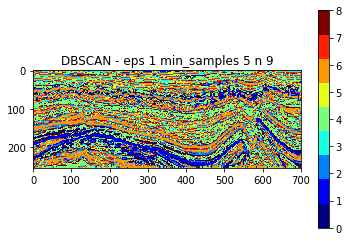

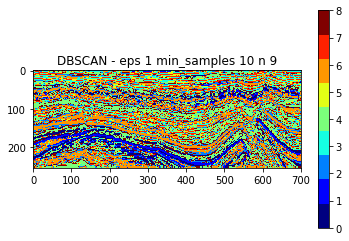

In [9]:
#DBSCAN
from sklearn.cluster import DBSCAN

#Select a linear model
print("DBSCAN")

eps_grid = [0.1, 0.5, 1]
min_sample_grid = [2, 5, 10]

for eps in tqdm(eps_grid):
    for min_samples in tqdm(min_sample_grid):
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        clusters = model.fit_predict(data_train)
                
        title = "DBSCAN - eps " + str(eps) + " min_samples " + str(min_samples) + " n " + str(len(set(clusters)) - (1 if -1 in clusters else 0))
        plotFacies(clusters.reshape(n_facies, 701, 255), title)
        joblib.dump(model, title + ".sav")
        

GMM - Gaussian Mixture Models


  0%|          | 0/9 [00:00<?, ?it/s]

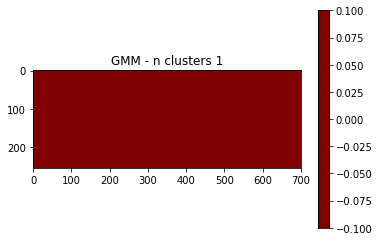

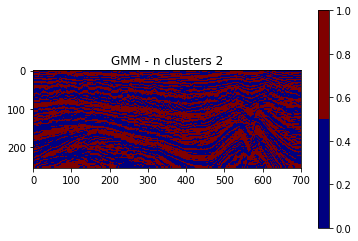

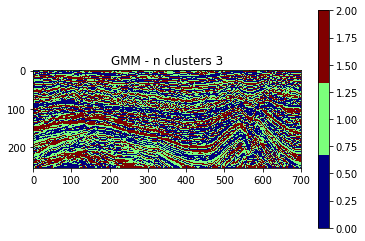

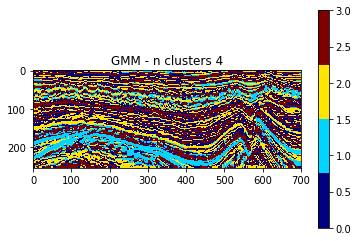

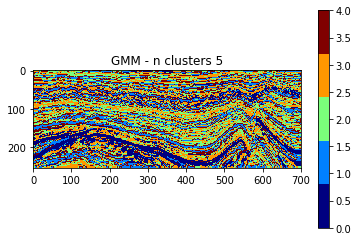

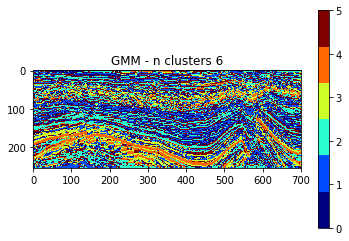

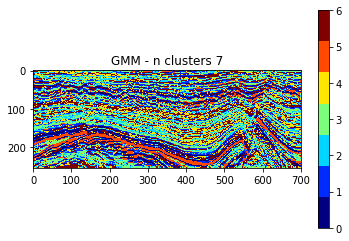

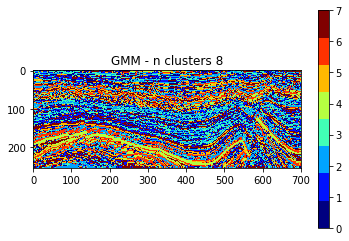

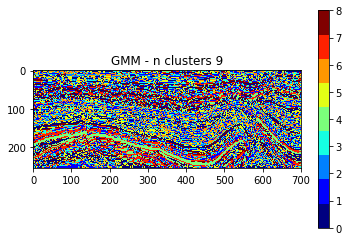

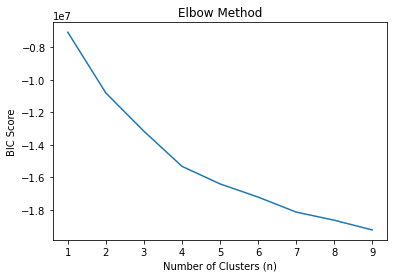

In [10]:
#GMM - Gaussian Mixture Models
from sklearn.mixture import GaussianMixture

#Select a linear model
print("GMM - Gaussian Mixture Models")

score = []

for n in tqdm(range(1, 10)):
        
    model = GaussianMixture(n_components = n)
    clusters = model.fit_predict(data_train)
    score.append(model.bic(data_train))
    
    title = "GMM - n clusters " + str(n)
    plotFacies(clusters.reshape(n_facies, 701, 255), title)
    joblib.dump(model, title + ".sav")

plt.plot(range(1, 10), score)
plt.xlabel('Number of Clusters (n)')
plt.ylabel('BIC Score')
plt.title('Elbow Method')
plt.show()

## CASE 2 | Only seismic data

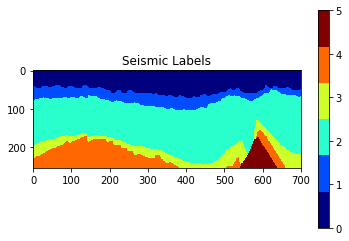

(1787550, 1)


In [11]:
#Define min max scaler
scaler = MinMaxScaler()

#Transform data
data_train = scaler.fit_transform(np.array(data["data"]).reshape(-1, 1))

plotFacies(seismic_labels_1d.reshape(n_facies, 701, 255), "Seismic Labels")
print(data_train.shape)

K-means Clustering


  0%|          | 0/9 [00:00<?, ?it/s]

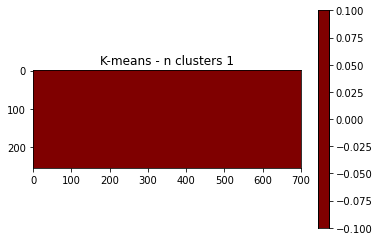

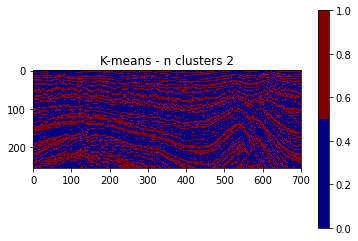

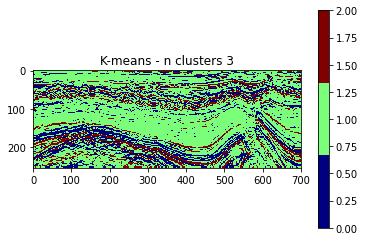

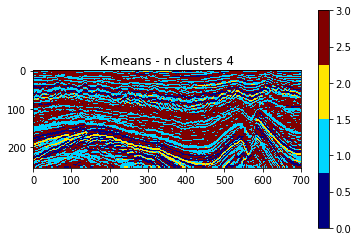

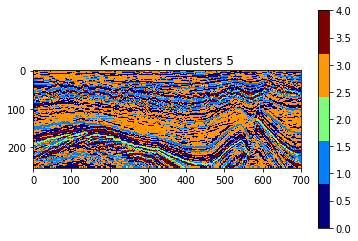

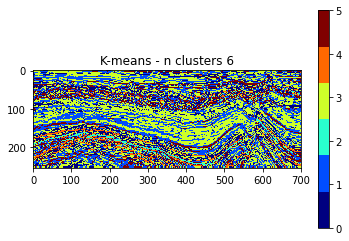

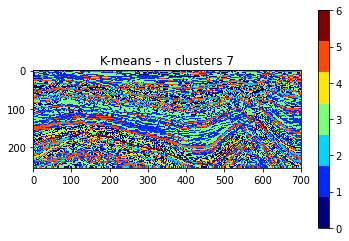

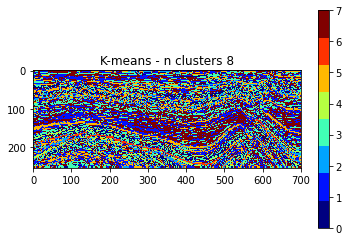

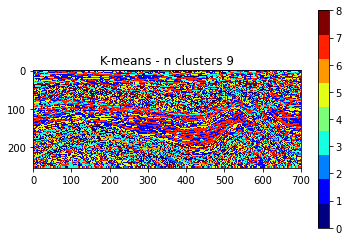

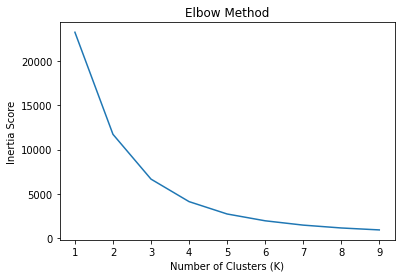

In [12]:
#K-means Clustering
import joblib
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm

#Select a linear model
print("K-means Clustering")

score = []

for n in tqdm(range(1, 10)):
        
    model = KMeans(n_clusters = n, random_state = 0, n_init = "auto")
    clusters = model.fit_predict(data_train)
    
    title = "K-means - n clusters " + str(n)
    plotFacies(clusters.reshape(n_facies, 701, 255), title)
    score.append(model.inertia_)
    joblib.dump(model, title + ".sav")

plt.plot(range(1, 10), score)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia Score')
plt.title('Elbow Method')
plt.show()

DBSCAN


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

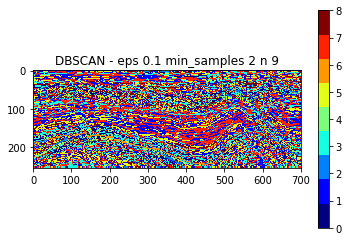

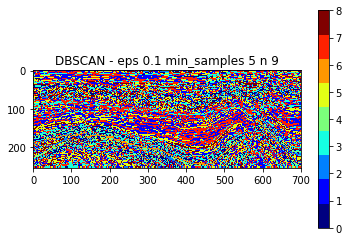

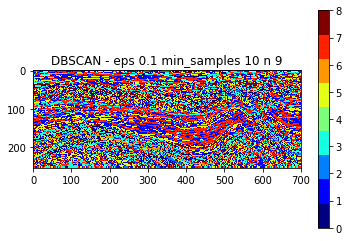

  0%|          | 0/3 [00:00<?, ?it/s]

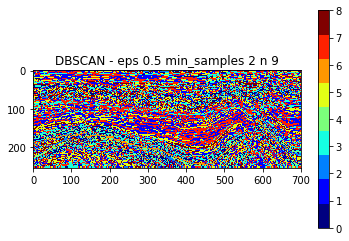

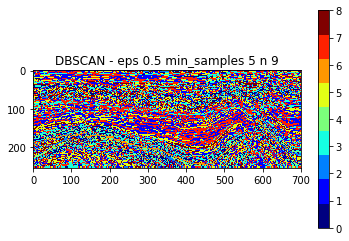

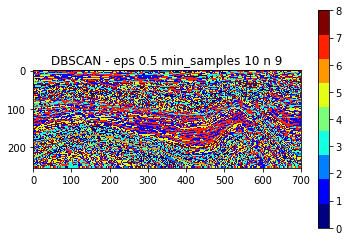

  0%|          | 0/3 [00:00<?, ?it/s]

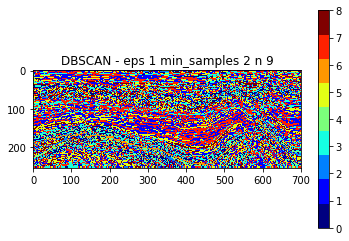

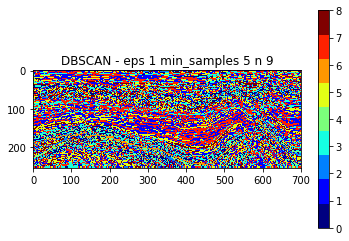

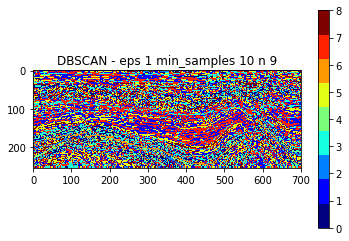

In [13]:
#DBSCAN
from sklearn.cluster import DBSCAN

#Select a linear model
print("DBSCAN")

eps_grid = [0.1, 0.5, 1]
min_sample_grid = [2, 5, 10]

for eps in tqdm(eps_grid):
    for min_samples in tqdm(min_sample_grid):
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        clusters = model.fit_predict(data_train)
                
        title = "DBSCAN - eps " + str(eps) + " min_samples " + str(min_samples) + " n " + str(len(set(clusters)) - (1 if -1 in clusters else 0))
        plotFacies(clusters.reshape(n_facies, 701, 255), title)
        joblib.dump(model, title + ".sav")
        

GMM - Gaussian Mixture Models


  0%|          | 0/9 [00:00<?, ?it/s]

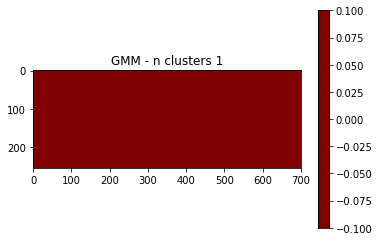

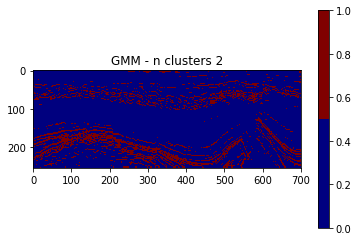

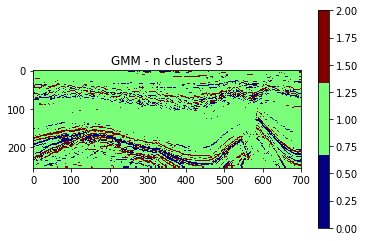

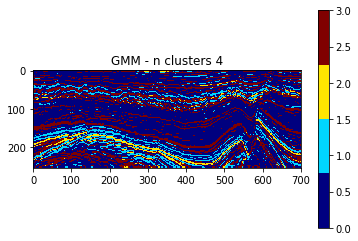

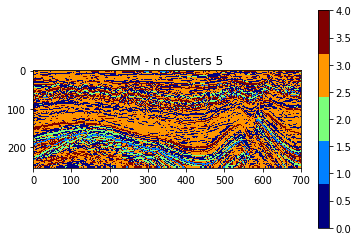

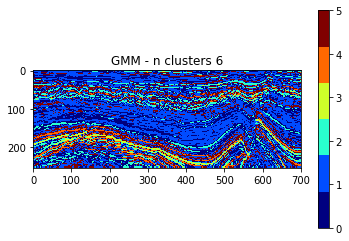

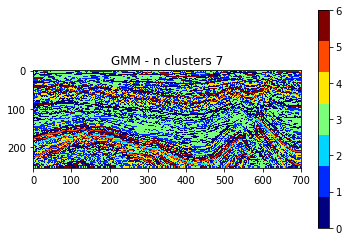

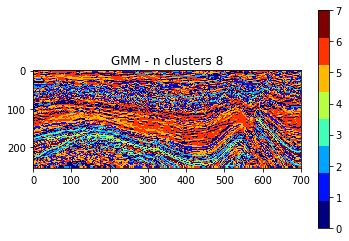

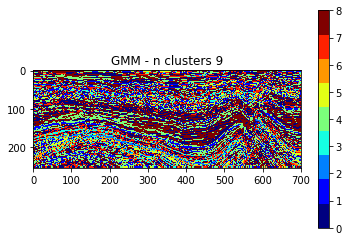

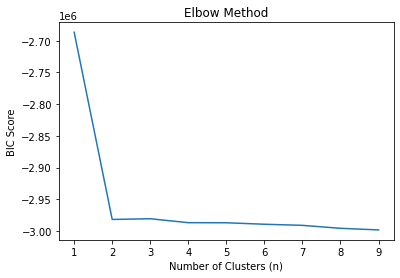

In [14]:
#GMM - Gaussian Mixture Models
from sklearn.mixture import GaussianMixture

#Select a linear model
print("GMM - Gaussian Mixture Models")

score = []

for n in tqdm(range(1, 10)):
        
    model = GaussianMixture(n_components = n)
    clusters = model.fit_predict(data_train)
    score.append(model.bic(data_train))
    
    title = "GMM - n clusters " + str(n)
    plotFacies(clusters.reshape(n_facies, 701, 255), title)
    joblib.dump(model, title + ".sav")

plt.plot(range(1, 10), score)
plt.xlabel('Number of Clusters (n)')
plt.ylabel('BIC Score')
plt.title('Elbow Method')
plt.show()

## CASE 3 | Seismic data and cos_inst_phase

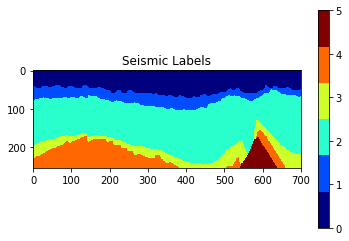

(1787550, 2)


In [17]:
#Define min max scaler
scaler = MinMaxScaler()

#Transform data
data_train = scaler.fit_transform(data[["data", "cos_inst_phase"]])

plotFacies(seismic_labels_1d.reshape(n_facies, 701, 255), "Seismic Labels")
print(data_train.shape)

K-means Clustering


  0%|          | 0/9 [00:00<?, ?it/s]

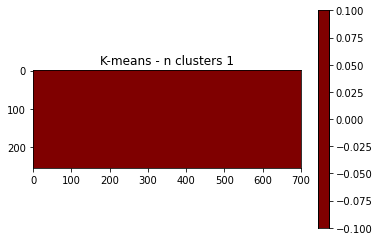

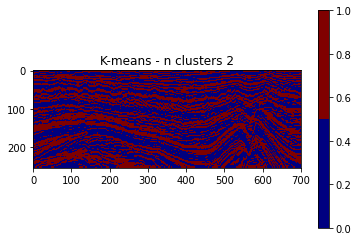

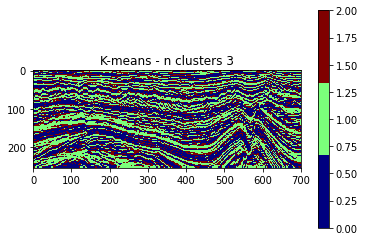

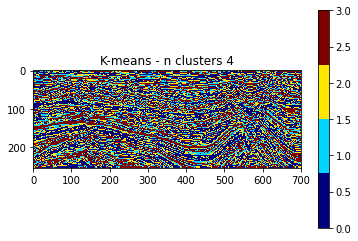

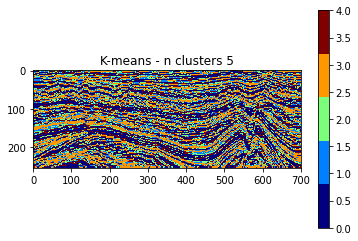

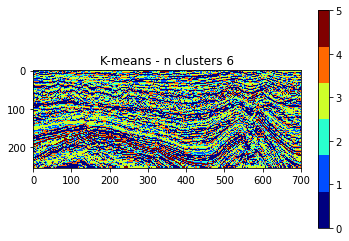

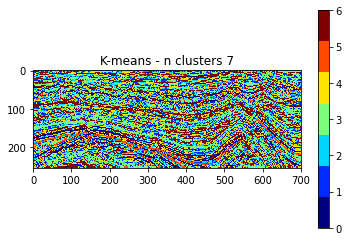

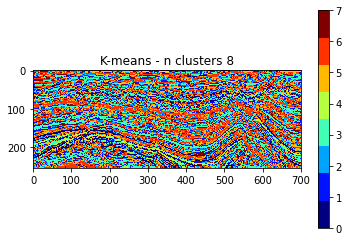

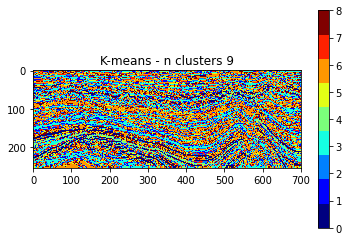

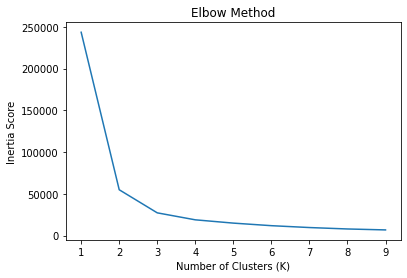

In [18]:
#K-means Clustering
import joblib
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm

#Select a linear model
print("K-means Clustering")

score = []

for n in tqdm(range(1, 10)):
        
    model = KMeans(n_clusters = n, random_state = 0, n_init = "auto")
    clusters = model.fit_predict(data_train)
    
    title = "K-means - n clusters " + str(n)
    plotFacies(clusters.reshape(n_facies, 701, 255), title)
    score.append(model.inertia_)
    joblib.dump(model, title + ".sav")

plt.plot(range(1, 10), score)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia Score')
plt.title('Elbow Method')
plt.show()

DBSCAN


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

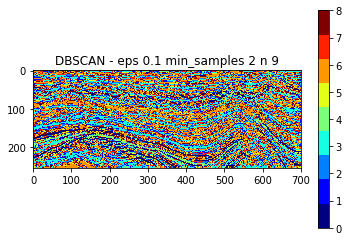

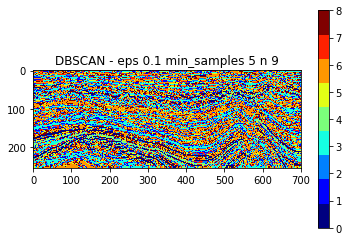

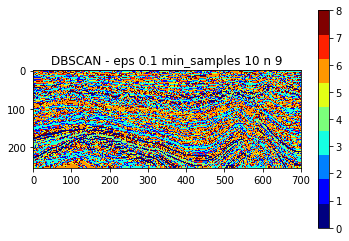

  0%|          | 0/3 [00:00<?, ?it/s]

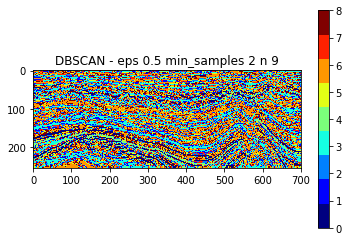

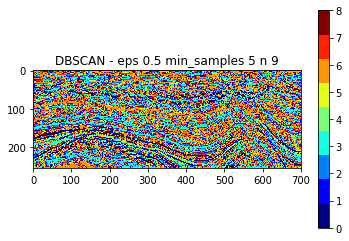

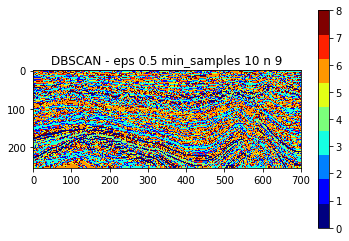

  0%|          | 0/3 [00:00<?, ?it/s]

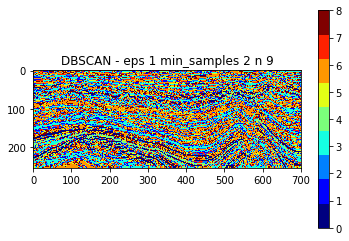

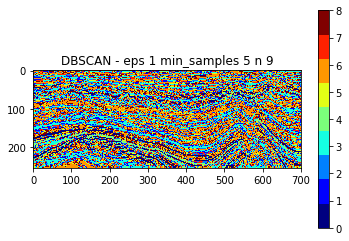

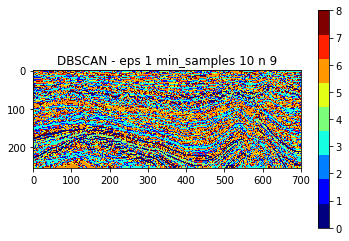

In [19]:
#DBSCAN
from sklearn.cluster import DBSCAN

#Select a linear model
print("DBSCAN")

eps_grid = [0.1, 0.5, 1]
min_sample_grid = [2, 5, 10]

for eps in tqdm(eps_grid):
    for min_samples in tqdm(min_sample_grid):
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        clusters = model.fit_predict(data_train)
                
        title = "DBSCAN - eps " + str(eps) + " min_samples " + str(min_samples) + " n " + str(len(set(clusters)) - (1 if -1 in clusters else 0))
        plotFacies(clusters.reshape(n_facies, 701, 255), title)
        joblib.dump(model, title + ".sav")
        

GMM - Gaussian Mixture Models


  0%|          | 0/9 [00:00<?, ?it/s]

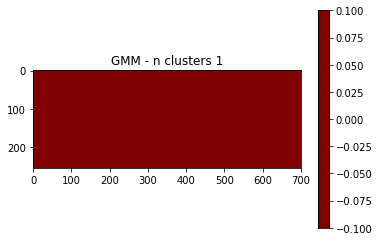

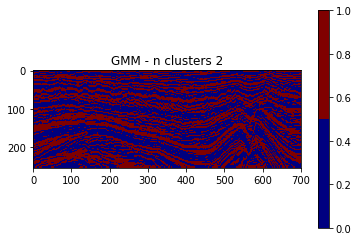

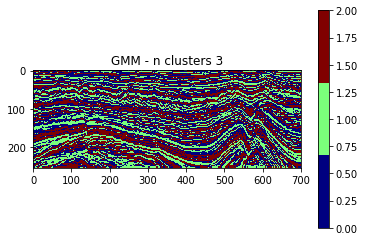

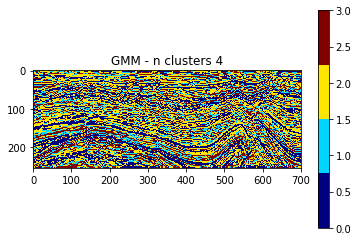

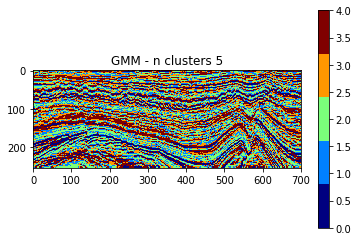

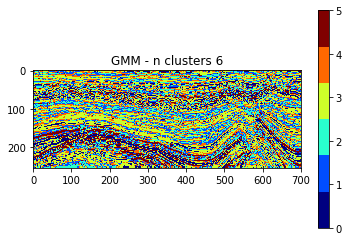

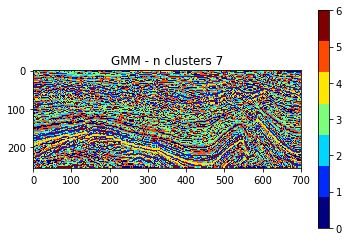

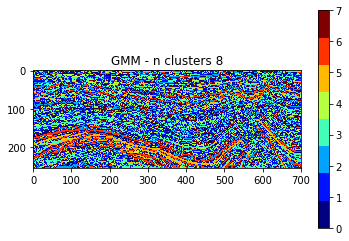

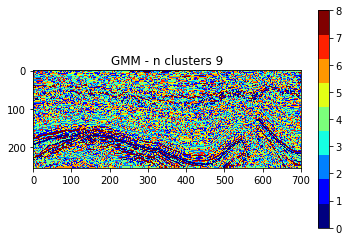

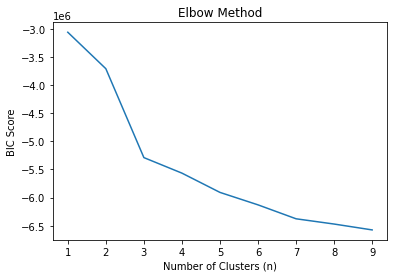

In [20]:
#GMM - Gaussian Mixture Models
from sklearn.mixture import GaussianMixture

#Select a linear model
print("GMM - Gaussian Mixture Models")

score = []

for n in tqdm(range(1, 10)):
        
    model = GaussianMixture(n_components = n)
    clusters = model.fit_predict(data_train)
    score.append(model.bic(data_train))
    
    title = "GMM - n clusters " + str(n)
    plotFacies(clusters.reshape(n_facies, 701, 255), title)
    joblib.dump(model, title + ".sav")

plt.plot(range(1, 10), score)
plt.xlabel('Number of Clusters (n)')
plt.ylabel('BIC Score')
plt.title('Elbow Method')
plt.show()

## CASE 4 | Seismic data with 4-neighbors

In [9]:
import pandas as pd

#From a 3-dimensional dataset, add 4th dimension with neighbors'value
def neighbors_4(data):
    
    print("Data shape before: ", data.shape)
    
    neighbors = np.zeros([data.shape[0], data.shape[1], data.shape[2], 5])
    
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            for k in range(data.shape[2]):
                    
                neighbors[i, j, k, 0] = data[i, j, max(k-2, 0)]
                neighbors[i, j, k, 1] = data[i, j, max(k-1, 0)]
                neighbors[i, j, k, 2] = data[i, j, k]
                neighbors[i, j, k, 3] = data[i, j, min(k+1, data.shape[2] - 1)]
                neighbors[i, j, k, 4] = data[i, j, min(k+2, data.shape[2] - 1)]
                
    neighbors = neighbors.reshape(-1, neighbors.shape[-1])
    print("Neighbors shape: ", neighbors.shape)
    
    df = pd.DataFrame(neighbors)
    print(df)
    
    return df

In [10]:
import pandas as pd

seismic_labels_1d = seismic_labels.reshape(-1)
data = neighbors_4(seismic_data)
print(data)

Data shape before:  (200, 701, 255)
Neighbors shape:  (35751000, 5)
                 0         1         2         3         4
0         0.000000  0.000000  0.000000  0.008296  0.050130
1         0.000000  0.000000  0.008296  0.050130  0.079065
2         0.000000  0.008296  0.050130  0.079065  0.058989
3         0.008296  0.050130  0.079065  0.058989 -0.008284
4         0.050130  0.079065  0.058989 -0.008284 -0.095361
...            ...       ...       ...       ...       ...
35750995 -0.058397  0.006551 -0.023023 -0.091648 -0.114188
35750996  0.006551 -0.023023 -0.091648 -0.114188 -0.103563
35750997 -0.023023 -0.091648 -0.114188 -0.103563 -0.103563
35750998 -0.091648 -0.114188 -0.103563 -0.103563 -0.103563
35750999 -0.114188 -0.103563 -0.103563 -0.103563 -0.103563

[35751000 rows x 5 columns]
                 0         1         2         3         4
0         0.000000  0.000000  0.000000  0.008296  0.050130
1         0.000000  0.000000  0.008296  0.050130  0.079065
2         0.000000

In [11]:
from sklearn.preprocessing import MinMaxScaler

#Define min max scaler
scaler = MinMaxScaler()

#Transform data
data_train = scaler.fit_transform(data)

K-means Clustering


  0%|          | 0/2 [00:00<?, ?it/s]

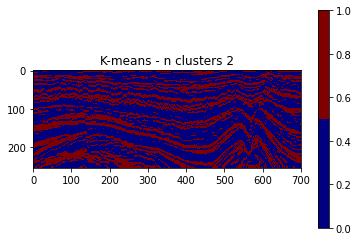

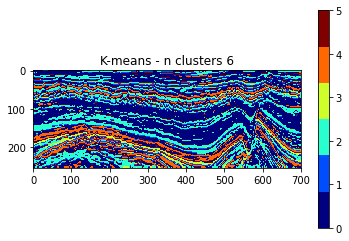

In [12]:
#K-means Clustering
import joblib
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm

#Select a linear model
print("K-means Clustering")

score = []

for n in tqdm([2, 6]):
        
    model = KMeans(n_clusters = n, random_state = 0, n_init = "auto")
    clusters = model.fit_predict(data_train)
    
    title = "K-means - n clusters " + str(n)
    plotFacies(clusters.reshape(n_facies, 701, 255), title)
    score.append(model.inertia_)
    joblib.dump(model, title + ".sav")

plt.show()

GMM - Gaussian Mixture Models


  0%|          | 0/2 [00:00<?, ?it/s]

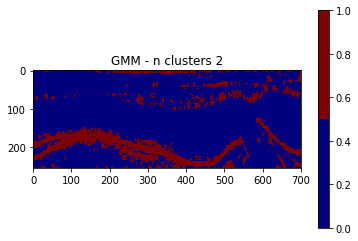

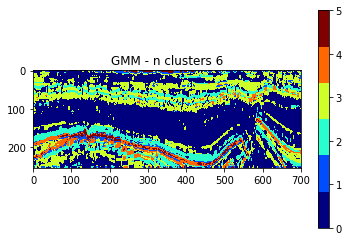

In [13]:
#GMM - Gaussian Mixture Models
from sklearn.mixture import GaussianMixture

#Select a linear model
print("GMM - Gaussian Mixture Models")

score = []

for n in tqdm([2, 6]):
        
    model = GaussianMixture(n_components = n)
    clusters = model.fit_predict(data_train)
    score.append(model.bic(data_train))
    
    title = "GMM - n clusters " + str(n)
    plotFacies(clusters.reshape(n_facies, 701, 255), title)
    joblib.dump(model, title + ".sav")

plt.show()

In [ ]:
plotFacies(seismic_labels_1d.reshape(n_facies, 701, 255), "Seismic Labels")
print(data_train.shape)

# Trash

In [18]:
#Evaluate using the labels given
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

confusion_matrix(y_train_5, y_train_pred)
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

NameError: name 'y_train_5' is not defined

In [5]:
#Previous way

import pandas as pd

seismic_data_1d           = seismic_data.reshape(-1)
seismic_inst_freq_1d      = seismic_inst_freq.reshape(-1)
seismic_cos_inst_phase_1d = seismic_cos_inst_phase.reshape(-1)
seismic_envelope_1d       = seismic_envelope.reshape(-1)
label = seismic_labels.reshape(-1)

data = pd.DataFrame(seismic_data_1d, columns = ['data'])
data['inst_freq']      = seismic_inst_freq_1d
data['cos_inst_phase'] = seismic_cos_inst_phase_1d
data['envelope']       = seismic_envelope_1d

print(data)

            data  inst_freq  cos_inst_phase  envelope
0       0.000000   2.070780   -1.608123e-16  0.228563
1       0.008296  12.601803    1.270262e-01  0.065308
2       0.050130  14.886615    5.637458e-01  0.088922
3       0.079065   3.774447    7.124919e-01  0.110969
4       0.058989  17.552627    3.739940e-01  0.157728
...          ...        ...             ...       ...
893770  0.550454  14.998811    6.806001e-01  0.808777
893771  0.716704  14.482301    8.719870e-01  0.821920
893772  0.750235  10.663124    9.959214e-01  0.753308
893773  0.735790  14.772050    9.991608e-01  0.736408
893774  0.735790  12.258988    7.926959e-01  0.928212

[893775 rows x 4 columns]


(35751000,)


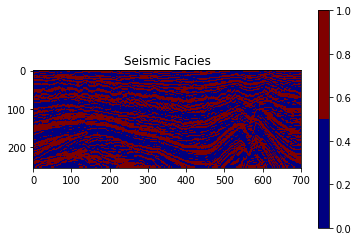

In [33]:
model = KMeans(n_clusters = 2, random_state = 0, n_init = "auto")
y_pred = model.fit_predict(data_train)

# Make predictions using the best estimator
print(y_pred.shape)

plot_y = y_pred.reshape(n_facies, 701, 255)
plotFacies(plot_y)

(35751000,)


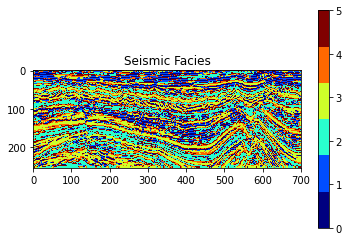

In [34]:
model = KMeans(n_clusters = 6, random_state = 0, n_init = "auto")
y_pred = model.fit_predict(data_train)

# Make predictions using the best estimator
print(y_pred.shape)

plot_y = y_pred.reshape(n_facies, 701, 255)
plotFacies(plot_y)